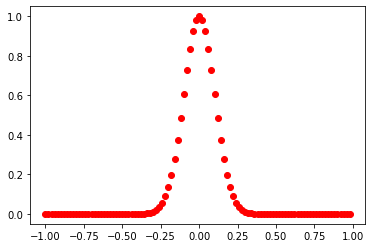

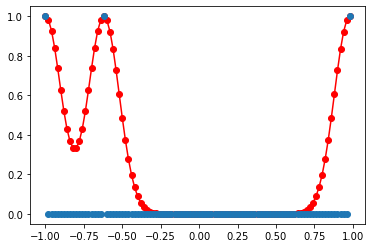

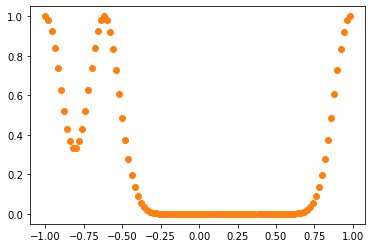

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter
import scipy.fftpack as fftpack 

def gaussian_kern(x, sig):
    kern=np.exp(-x**2/(2*sig**2))
    return kern

x=np.linspace(-1, 1, 100, endpoint=False)
G=gaussian_kern(x, 0.1)
q=np.zeros(len(G))

q[0]=1  # placer en 0 pour voir l'effet du zero padding
q[19]=1
q[99]=1  # placer en 99 pour voir l'effet du zero padding

plt.figure()
plt.plot(x, G, 'ro')
plt.show()

npcv=filter.convolve1d(q, G, mode='constant')

#cv=np.real(filter.convolve1d(q, G, ) ) # DANGER mode='reflect', cval=0 ==> mode='constant', cval=0
cv=np.real(npcv)

plt.figure()
plt.plot(x, cvfft, 'r-')
plt.plot(x, cv, 'ro')
plt.plot(x, q[0:len(x)], 'o')

plt.figure()
plt.plot(x, cv[0:len(x)], '.')
plt.plot(x, npcv[0:len(x)], 'o')

(101, 101)


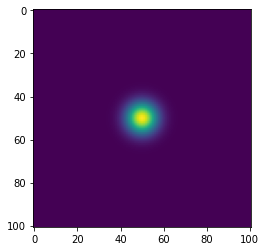

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filter
from scipy import ndimage
import scipy.fftpack as fftpack 
from scipy.ndimage import gaussian_filter

def gaussian_kern(x, y, sig):
    kern=np.exp(-(x**2+y**2)/(2*sig**2))
    return kern

sig = np.zeros(shape=(101,101))
sig[50, 50]=1

result = gaussian_filter(sig, sigma=10)
plt.imshow(result)

T=10
x = np.linspace(-T, T, 101)
y = np.linspace(-T, T, 101)
xv, yv = np.meshgrid(x, y)

G = gaussian_kern(xv, yv, 1)
print(G.shape)
npcv=ndimage.convolve(sig, G, mode='constant', cval=0)
plt.imshow(npcv)

In [14]:
import scipy.ndimage
help(scipy.ndimage)

Help on package scipy.ndimage in scipy:

NAME
    scipy.ndimage

DESCRIPTION
    Multidimensional image processing (:mod:`scipy.ndimage`)
    
    .. currentmodule:: scipy.ndimage
    
    This package contains various functions for multidimensional image
    processing.
    
    
    Filters
    
    .. autosummary::
       :toctree: generated/
    
       convolve - Multidimensional convolution
       convolve1d - 1-D convolution along the given axis
       correlate - Multidimensional correlation
       correlate1d - 1-D correlation along the given axis
       gaussian_filter
       gaussian_filter1d
       gaussian_gradient_magnitude
       gaussian_laplace
       generic_filter - Multidimensional filter using a given function
       generic_filter1d - 1-D generic filter along the given axis
       generic_gradient_magnitude
       generic_laplace
       laplace - N-D Laplace filter based on approximate second derivatives
       maximum_filter
       maximum_filter1d
       median_